In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:\\Users\\shubh\\OneDrive\\Desktop\\intern\\week 3\\day 1\\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
data = data [["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [31]:
# instantiate the scaler (StandardScaler is already imported in an earlier cell)
scalar = StandardScaler()
data["housing_median_age"] = scalar.fit_transform(data[["housing_median_age"]])
data["total_rooms"] = scalar.fit_transform(data[["total_rooms"]])
data["total_bedrooms"] = scalar.fit_transform(data[["total_bedrooms"]])
data["population"] = scalar.fit_transform(data[["population"]])
data["households"] = scalar.fit_transform(data[["households"]])
data["median_income"] = scalar.fit_transform(data[["median_income"]])
data["median_house_value"] = scalar.fit_transform(data[["median_house_value"]])


In [32]:
x = data[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y = data["median_house_value"] 
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766
1,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238
2,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699
3,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968
4,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881


In [37]:
x.shape       , y.shape

((20640, 6), (20640,))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
x_train.shape , y_test.shape

((16512, 6), (4128,))

In [39]:
y_train.shape , x_test.shape

((16512,), (4128, 6))

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
model.intercept_ , model.coef_

(np.float64(-0.0004031233752250273),
 array([ 0.20689504, -0.3781639 ,  0.37225745, -0.34987729,  0.42087675,
         0.78957398]))

In [63]:
predicrec_val = model.predict(x_test.fillna(x_test.median()))  # ensure test has no NaNs
predicrec_val

array([-1.01563067, -0.63514959,  0.46310274, ...,  1.93756317,
       -0.3385869 , -0.3757613 ], shape=(4128,))

In [69]:
np.sum((y_test - predicrec_val)**2) / len(y_test)

np.float64(0.44831839330855955)

In [67]:
mean_squared_error(y_test, predicrec_val)*100

44.831839330855956

In [68]:
r2_score(y_test, predicrec_val)

0.5444487171145861

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0            0.982143    -0.804819       -0.970325   -0.974429   -0.977033   
1           -0.607019     2.045890        1.348276    0.861439    1.669961   
2            1.856182    -0.535746       -0.825561   -0.820777   -0.843637   
3            1.856182    -0.624215       -0.718768   -0.766028   -0.733781   
4            1.856182    -0.462404       -0.611974   -0.759847   -0.629157   

   median_income  median_house_value  
0       2.344766            2.129631  
1       2.332238            1.314156  
2       1.782699            1.258693  
3       0.932968            1.165100  
4      -0.012881            1.172900  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  f

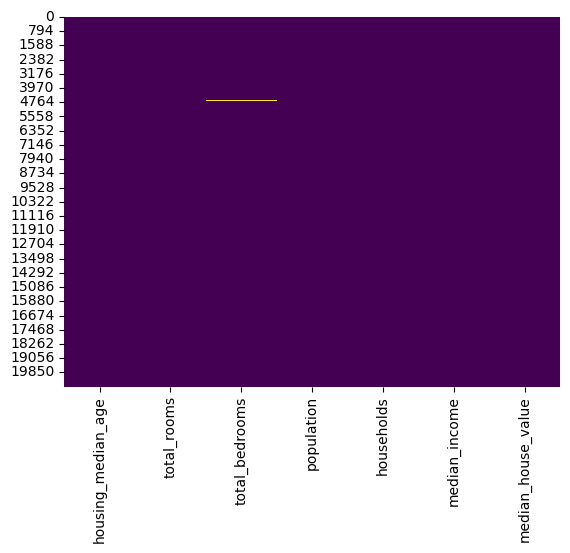

In [42]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


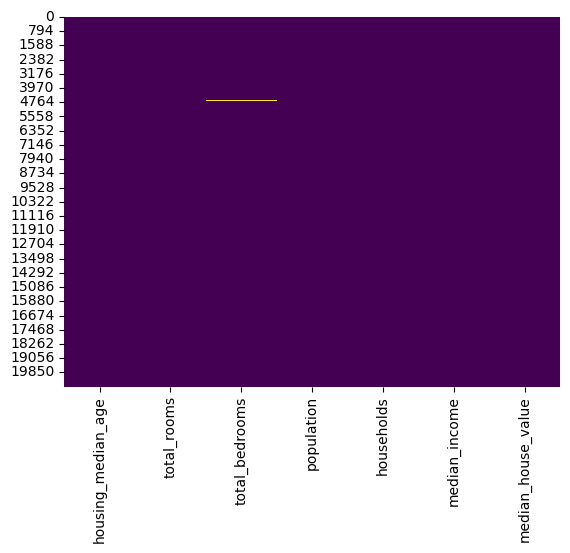

In [43]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

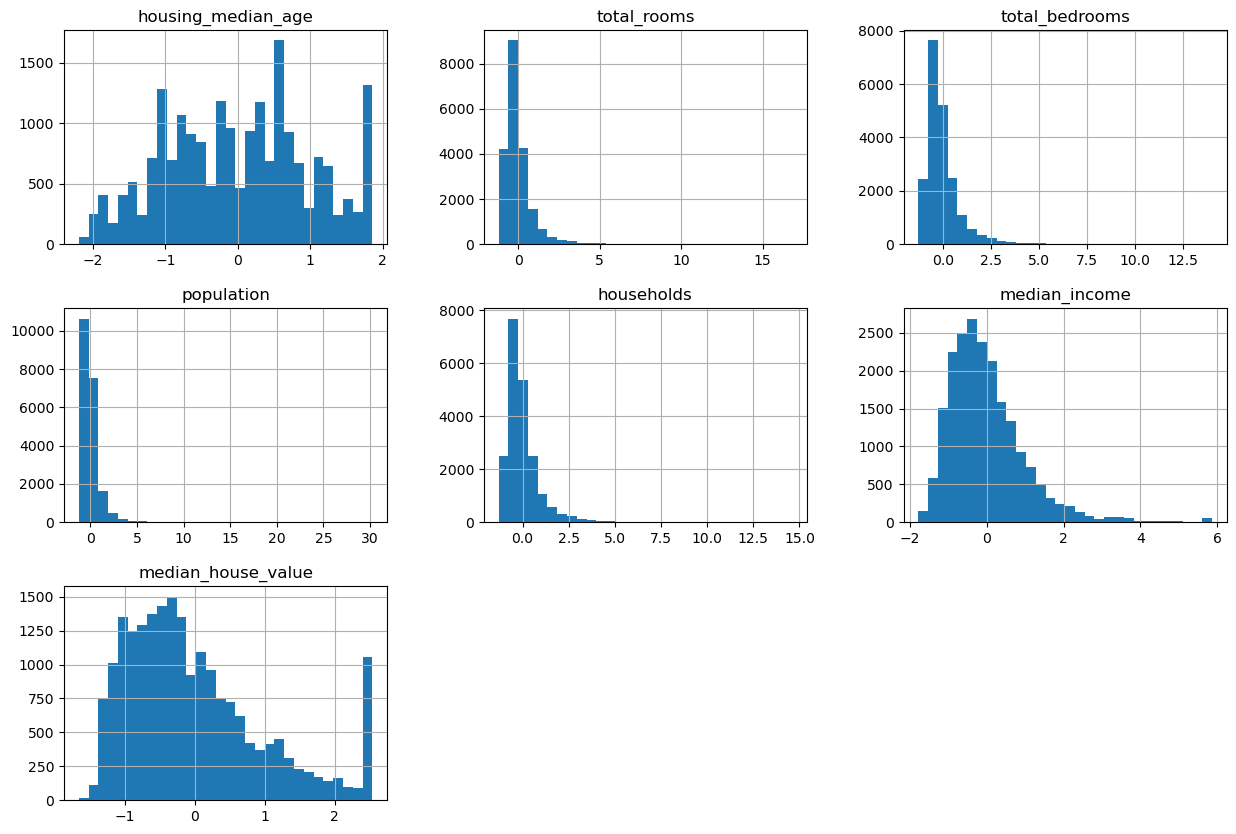

In [44]:
data.hist(bins=30, figsize=(15,10))
plt.show()

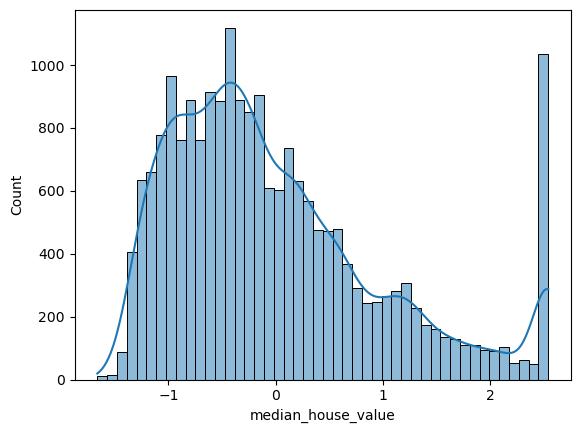

In [45]:
sns.histplot(data['median_house_value'], kde=True)
plt.show()

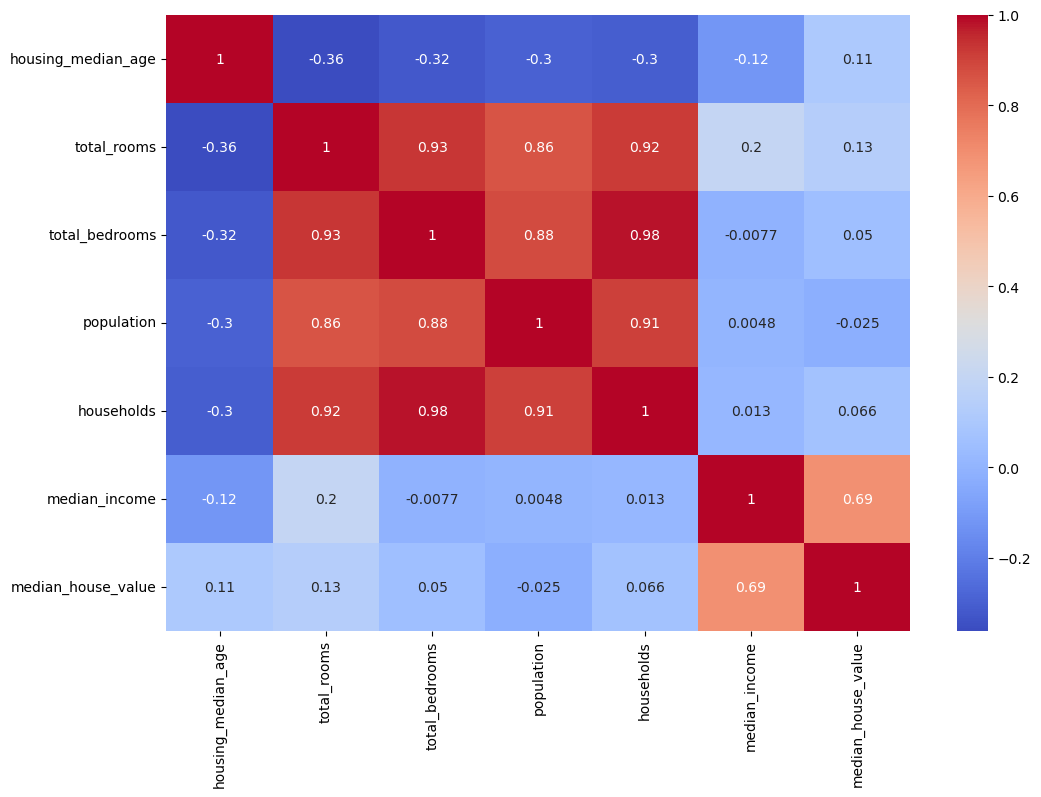

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

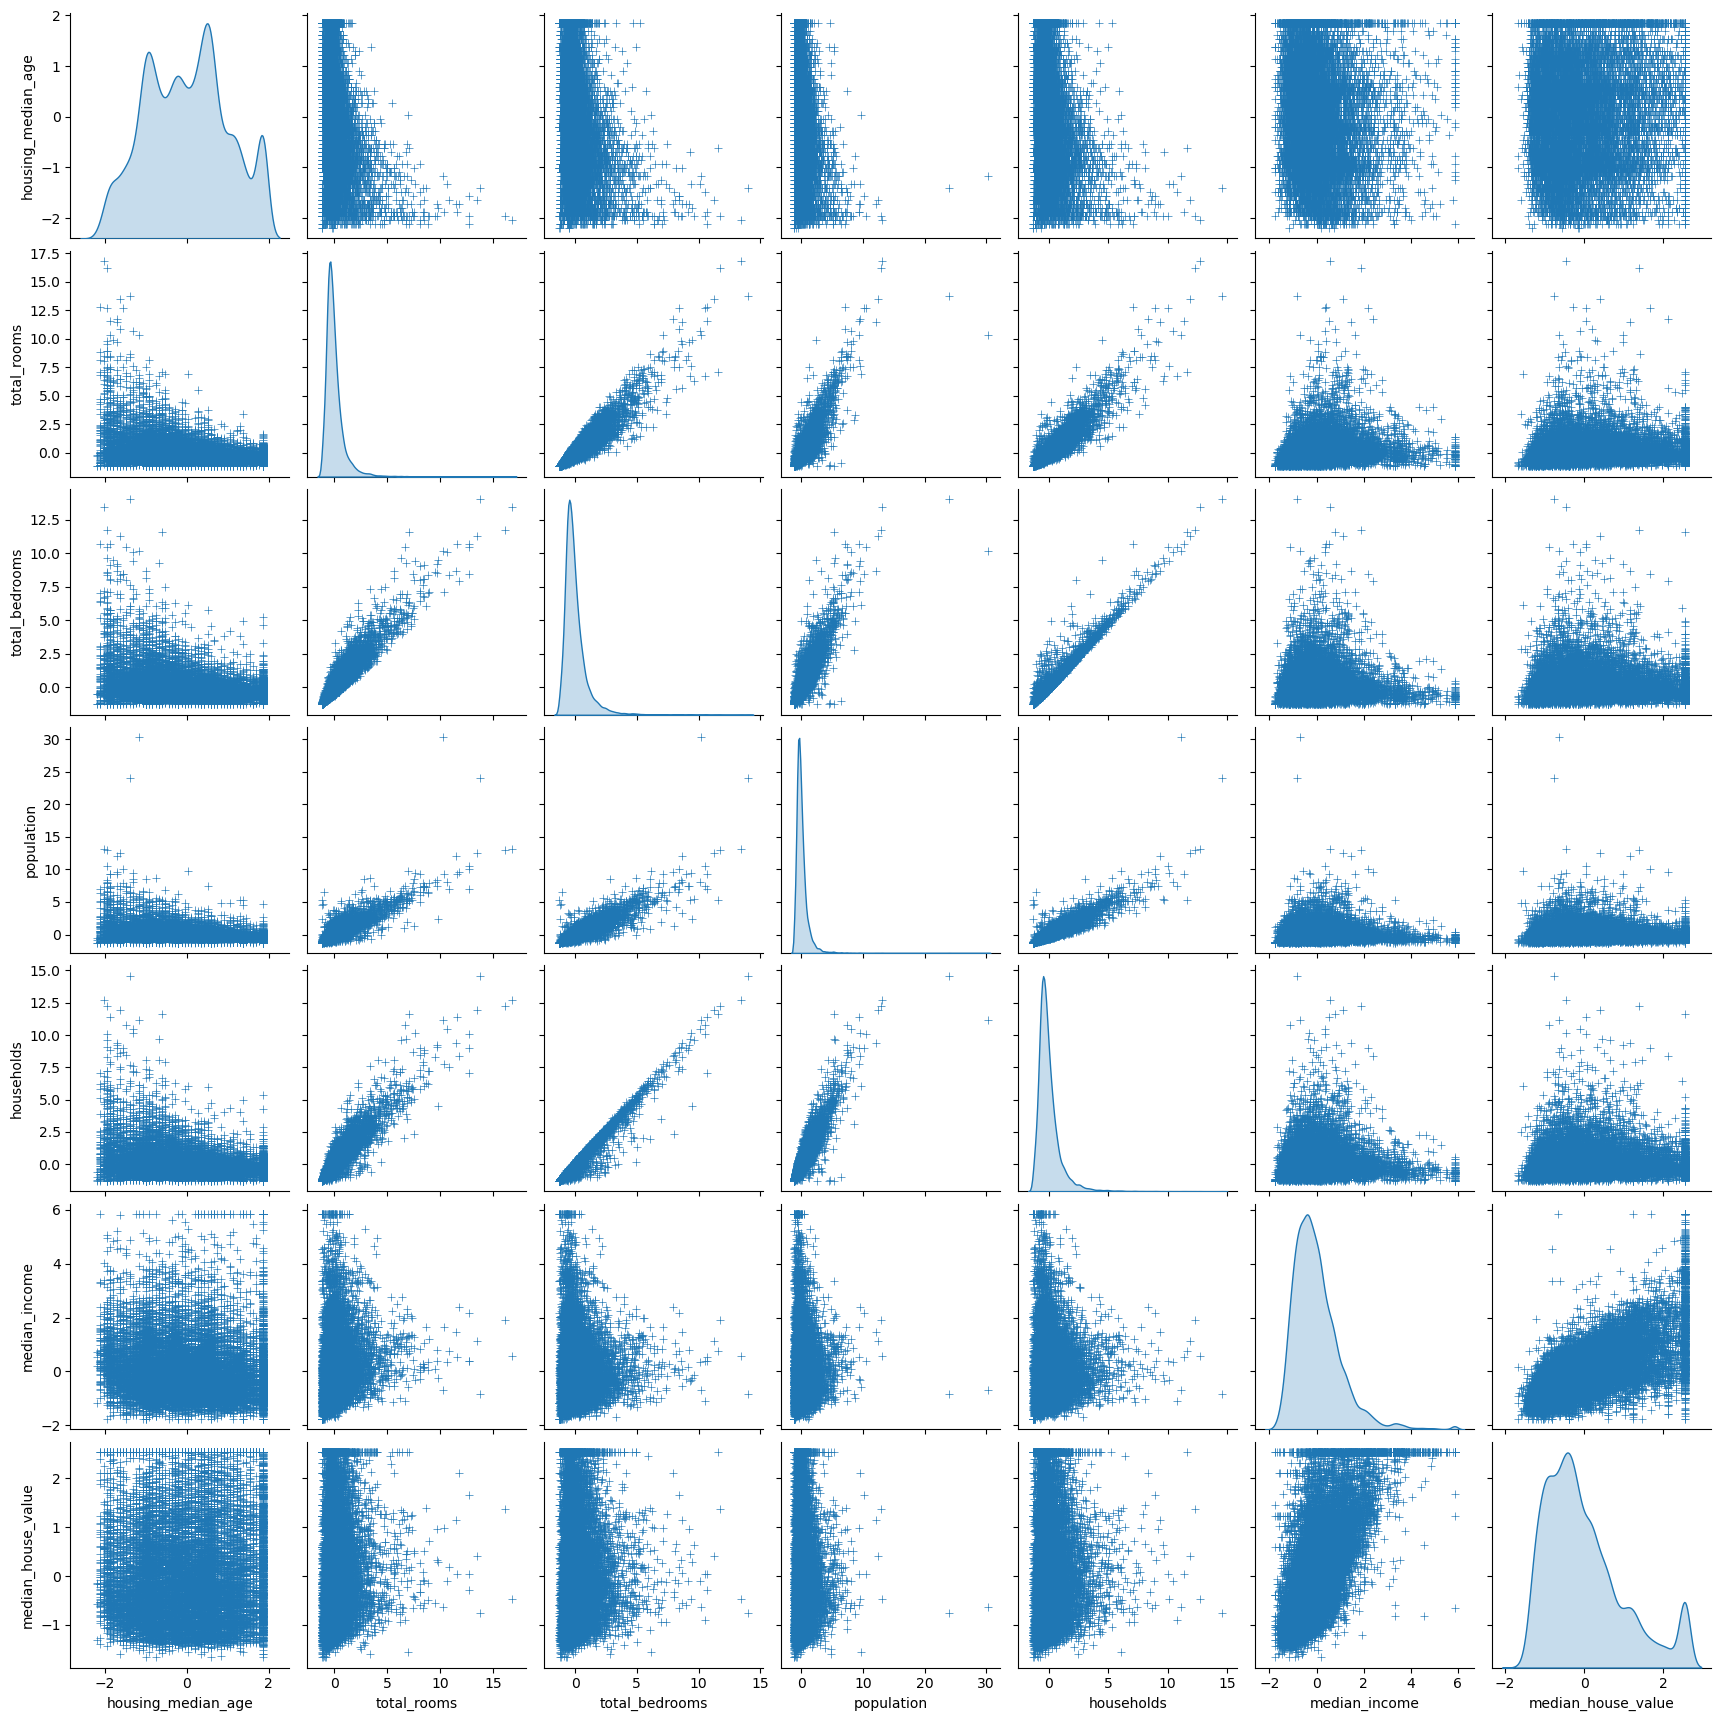

In [47]:
df_numeric = data.select_dtypes(include=[np.number])
sns.pairplot(df_numeric, diag_kind="kde", markers="+")
plt.show()
